In [ ]:
import random as rd

Variant = 20
rd.seed(Variant)


colors = ['COLOR_BLACK', 'COLOR_RED', 'COLOR_GREEN', 'СOLOR_YELLOW', 'COLOR_BLUE', 'COLOR_MAGENTA', 'COLOR_CYAN', 'COLOR_WHITE']
buttons = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'a', 's', 'd', 'f', 'g', 'h', 'j','k','l','z','x','c','v','b','n','m']
print("Алгоритм: " , rd.sample([1,2,3,4,5,6,7,8],1))
print("Цвета заполнения: " , rd.sample(colors,2))
print("Кнопки выхода, изменения скорости: " , rd.sample(buttons,2))

Алгоритм:  [3]
Цвета заполнения:  ['COLOR_BLUE', 'COLOR_MAGENTA']
Кнопки выхода, изменения скорости:  ['x', 'r']


Движение 3

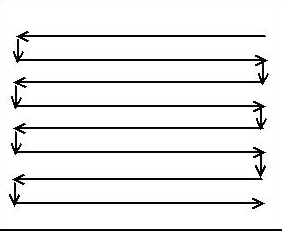


```
; 1.asm
format ELF64

public _start

extrn initscr
extrn start_color
extrn init_pair
extrn getmaxx
extrn getmaxy
extrn raw
extrn noecho
extrn keypad
extrn stdscr
extrn move
extrn getch
extrn addch
extrn refresh
extrn endwin
extrn exit
extrn timeout
extrn usleep
extrn printw

section '.bss' writable
    xmax dq 1
	ymax dq 1
	palette dq 1
    delay dq ?
    step dq ?

section '.text' executable

_start:
    call initscr
    xor rdi, rdi
	mov rdi, [stdscr]
	call getmaxx
    dec rax
	mov [xmax], rax
	call getmaxy
    dec rax
	mov [ymax], rax

    call start_color

    ; COLOR_BLUE
    mov rdi, 1
    mov rsi, 4
    mov rdx, 4
    call init_pair

    ; COLOR_MAGENTA
    mov rdi, 2
    mov rsi, 5
    mov rdx, 5
    call init_pair

    call refresh
	call noecho
	call raw

    mov rax, ' '
    or rax, 0x100
    mov [palette], rax
    mov r8, [xmax]
    xor r9, r9
    mov [step], -1
    mov [delay], 2000
    .main_loop:
        cmp [ymax], r9
        jnl .loop
        mov r8, [xmax]
        xor r9, r9
        mov [step], -1
        
        mov rax, [palette]
        and rax, 0x100
        cmp rax, 0
        jne .mag
        mov rax, [palette]
        and rax, 0xff
        or rax, 0x100
        jmp @f
        .mag:
        mov rax, [palette]
        and rax, 0xff
        or rax, 0x200
        @@:
        mov [palette], rax

        .loop:
            mov rdi, r9
            mov rsi, r8
            push r8
            push r9
            call move
            mov rdi, [palette]
            call addch
            call refresh
            mov rdi, 1
            call timeout
            call getch

            cmp rax, 'x'
            jne @f
            jmp .exit

            @@:
            cmp rax, 'r'
            jne @f
            cmp [delay], 2000
            je .fast
            mov [delay], 2000
            jmp @f
            .fast:
            mov [delay], 100
            @@:
            mov rdi, [delay]
            call usleep

            pop r9
            pop r8
            add r8, [step]
            cmp r8, 0
            jl .chdir
            cmp r8, [xmax]
            jg .chdir

            jmp .loop
        
        .chdir:
        cmp r8, 0
        jl @f
        mov [step], -1
        mov r8, [xmax]
        inc r9
        jmp .main_loop

        @@:
        mov [step], 1
        mov r8, 0
        inc r9
        jmp .main_loop
    
    .exit:
    call endwin
    call exit
```



работа программы показана в [видео](https://github.com/Andreytoropygin/System_Programming/blob/main/Lab_6/lab6.webm)
